# Testing models

In [2]:
# import pandas & numpy library
import pandas as pd
import numpy as np

# imoprt seaborn & matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# import KNN from sklearn
from sklearn.neighbors import KDTree

# shows a bigger plot size for readability 
plt.rcParams['figure.figsize'] = (12, 5)

In [3]:
# read 'songDb.tsv' into dataframe with correct encoding  
music = pd.read_csv('songDb.tsv', sep='\t', encoding='ISO-8859-1')

<ipython-input-3-1285b067de47>:2: DtypeWarning: Columns (11,18) have mixed types. Specify dtype option on import or set low_memory=False.
  music = pd.read_csv('songDb.tsv', sep='\t', encoding='ISO-8859-1')


# Initial EDA 

In [4]:
# heres a first look at the unaltered music
music.head()


,Name,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Type,ID,Uri,Ref_Track,URL_features,Duration_ms,time_signature,Genre
0,YuveYuveYu,0.624,0.857,10.0,-6.250,0.0,0.0542,0.020800,0.206000,0.110,0.324,131.926,audio_features,6J2VvzKwWc2f0JP5RQVZjq,spotify:track:6J2VvzKwWc2f0JP5RQVZjq,https://api.spotify.com/v1/tracks/6J2VvzKwWc2f...,https://api.spotify.com/v1/audio-analysis/6J2V...,282920.0,4.0,celticmetal
1,Gloryhammer,0.517,0.916,0.0,-4.933,1.0,0.0559,0.000182,0.001910,0.306,0.444,135.996,audio_features,4HA34COgxgVJ6zK88UN4Ik,spotify:track:4HA34COgxgVJ6zK88UN4Ik,https://api.spotify.com/v1/tracks/4HA34COgxgVJ...,https://api.spotify.com/v1/audio-analysis/4HA3...,300320.0,4.0,celticmetal
2,Nostos,0.251,0.894,8.0,-4.103,0.0,0.0570,0.014400,0.000000,0.123,0.297,114.223,audio_features,3W6Xik6Xxf06JuUoZSATlD,spotify:track:3W6Xik6Xxf06JuUoZSATlD,https://api.spotify.com/v1/tracks/3W6Xik6Xxf06...,https://api.spotify.com/v1/audio-analysis/3W6X...,175353.0,4.0,celticmetal
3,Yggdrasil,0.469,0.743,1.0,-5.570,0.0,0.0272,0.002220,0.000111,0.276,0.481,86.953,audio_features,2gGveBaLJQMtJ43X4UL5kH,spotify:track:2gGveBaLJQMtJ43X4UL5kH,https://api.spotify.com/v1/tracks/2gGveBaLJQMt...,https://api.spotify.com/v1/audio-analysis/2gGv...,272292.0,4.0,celticmetal
4,Incense&Iron,0.487,0.952,1.0,-4.429,0.0,0.0613,0.000228,0.000000,0.161,0.329,125.993,audio_features,1lRF81A1C9QoCgBcEop2zg,spotify:track:1lRF81A1C9QoCgBcEop2zg,https://api.spotify.com/v1/tracks/1lRF81A1C9Qo...,https://api.spotify.com/v1/audio-analysis/1lRF...,237933.0,4.0,celticmetal


In [5]:
# basics statistics for music
music.describe() 

,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Duration_ms
count,131580.000000,131580.000000,131580.000000,131580.000000,131580.000000,131580.000000,131580.000000,131580.000000,131580.000000,131580.000000,1.315800e+05
mean,0.553784,0.648783,5.311356,-8.523482,0.618985,0.083736,0.270991,0.231870,0.193345,0.493751,2.536664e+05
std,0.182683,0.255634,3.570006,4.789160,0.485626,0.101581,0.323490,0.353740,0.162596,1.799546,1.256204e+05
min,0.000000,0.000000,-14.372000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+00
25%,0.432000,0.487000,2.000000,-10.377000,0.000000,0.035900,0.007930,0.000002,0.095100,0.247000,1.909330e+05
50%,0.566000,0.690000,5.000000,-7.377000,1.000000,0.048300,0.105000,0.001480,0.125000,0.459000,2.290000e+05
75%,0.692000,0.853000,9.000000,-5.344000,1.000000,0.083000,0.487000,0.503000,0.246000,0.683000,2.854792e+05
max,0.988000,11.000000,11.000000,5.056000,1.000000,0.966000,0.996000,0.999000,1.000000,187.827000,5.949886e+06


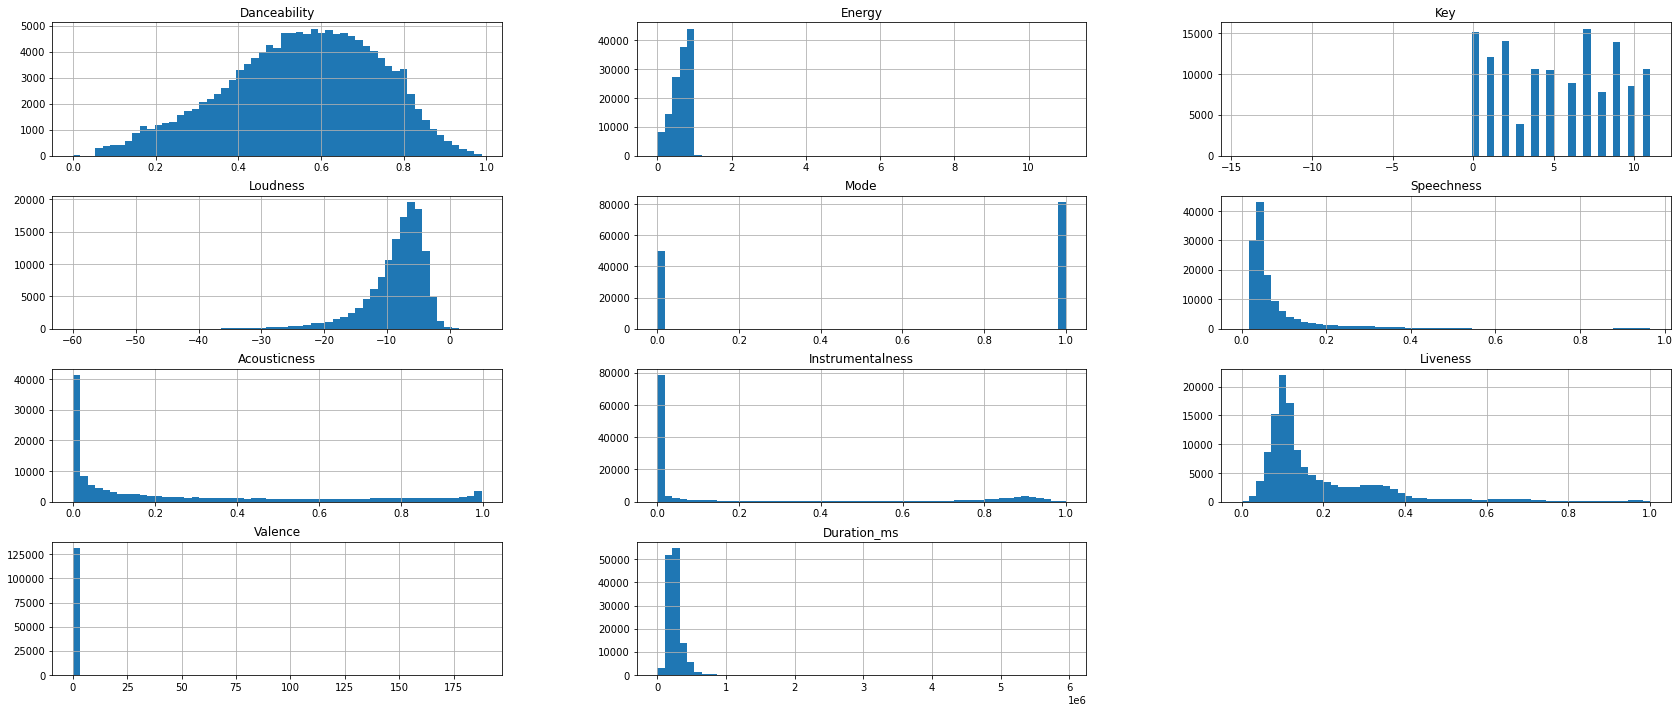

In [6]:
# shows a hist of all quantitive features 
#  need to format this better
plt.rcParams['figure.figsize'] = (29, 12) # increase size 
hist = music.hist(bins=55)

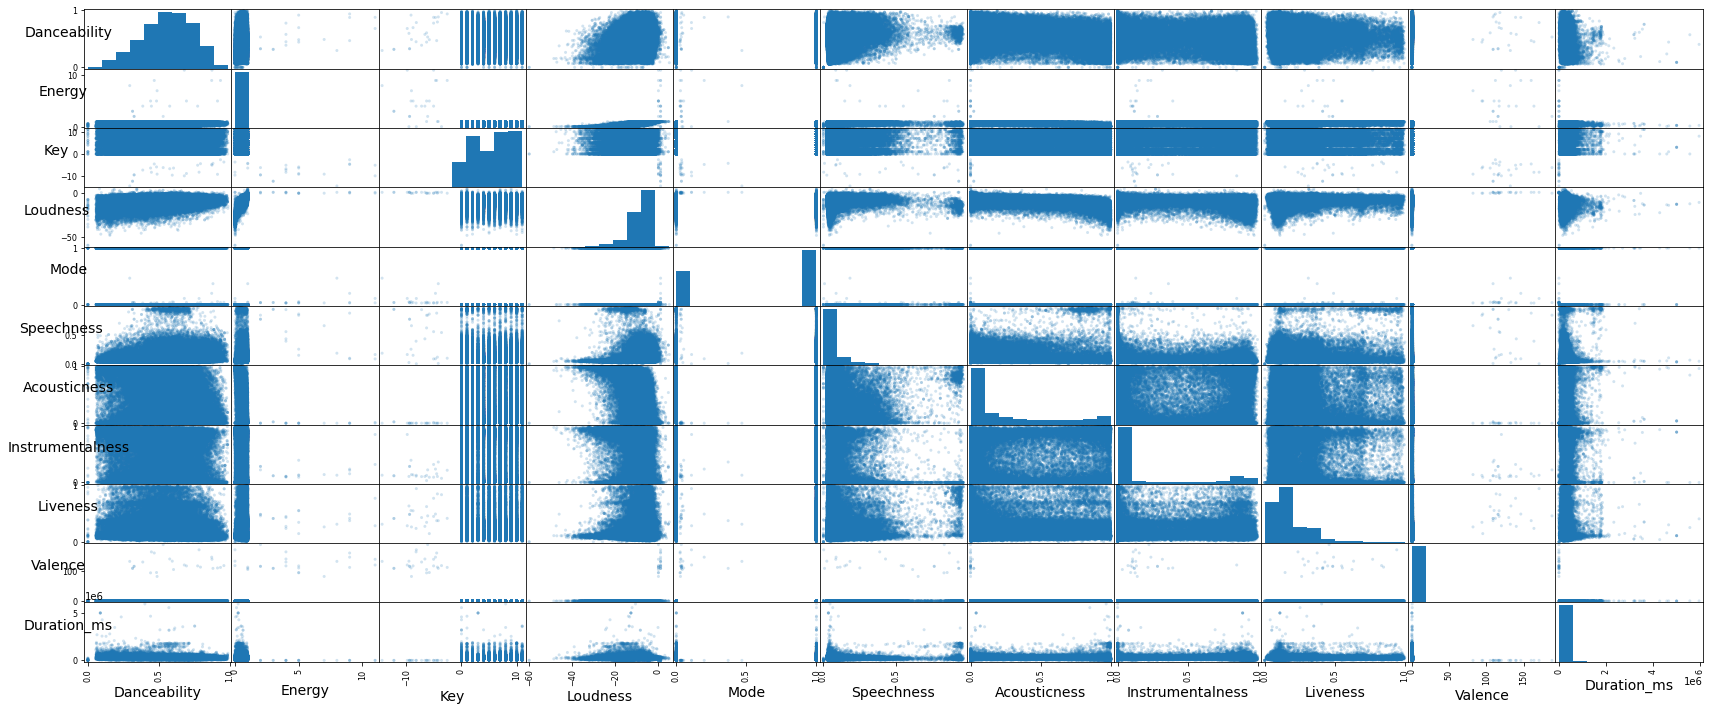

In [7]:
# We are using a scatter plot matrix to quickly see if there are any correlations in the data 
# shows a bigger plot size for readability 
plt.rcParams['figure.figsize'] = (29, 12)

# make a sub_music to exclude non quantitive columns from matrix 
sub_music =  music[['Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Duration_ms']]
sub_music

fig = pd.plotting.scatter_matrix(sub_music, alpha=0.2, figsize=(29,12)) 

for ax in fig.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 14, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 14, rotation = 0)

# Missing Data

In [8]:
# Calculate % of missing values in each column:
music.isna().mean()

Name                0.000015
Danceability        0.000000
Energy              0.000000
Key                 0.000000
Loudness            0.000000
Mode                0.000000
Speechness          0.000000
Acousticness        0.000000
Instrumentalness    0.000000
Liveness            0.000000
Valence             0.000000
Tempo               0.000000
Type                0.000000
ID                  0.000000
Uri                 0.000000
Ref_Track           0.000000
URL_features        0.000000
Duration_ms         0.000000
time_signature      0.000000
Genre               0.000198
dtype: float64

- As we can see the only column with a significant amount of missing data is Genre at 0.000198. We just need to drop rows with these missing genres 

In [9]:
# there are only 28 rows with missing data that is super low.
music.isna().sum().sum()

28

In [10]:
# Grouping Genres 

base = "genre_dataset.txt"
with open(base) as b:
    lines = b.read().splitlines()
split = np.array(lines)
split[:10]
df = pd.DataFrame(split, columns = ['genres'])
df.loc[df['genres'].str.contains('rock')] = 'Rock'
df.loc[df['genres'].str.contains('hip hop')] = 'Rap'
df.loc[df['genres'].str.contains('country')] = 'Country'
df.loc[df['genres'].str.contains('rap')] = 'Rap'
df.loc[df['genres'].str.contains('r&b')] = 'R&B'
df.loc[df['genres'].str.contains('folk')] = 'Folk'
df.loc[df['genres'].str.contains('acoustic')] = 'Acoustic'
df.loc[df['genres'].str.contains('core')] = 'Punk'
df.loc[df['genres'].str.contains('jazz')] = 'Jazz'
df.loc[df['genres'].str.contains('metal')] = 'Metal'
df.loc[df['genres'].str.contains('edm')] = 'Electronic'
df.loc[df['genres'].str.contains('electronic')] = 'Electronic'
df.loc[df['genres'].str.contains('house')] = 'Electronic'
df.loc[df['genres'].str.contains('industrial')] = 'Electronic'
df.loc[df['genres'].str.contains('glitch')] = 'Electronic'
df.loc[df['genres'].str.contains('idm')] = 'Electronic'
df.loc[df['genres'].str.contains('techno')] = 'Electronic'
df.loc[df['genres'].str.contains('garage')] = 'Electronic'
df.loc[df['genres'].str.contains('reggeaton')] = 'Electronic'
df.loc[df['genres'].str.contains('soul')] = 'Soul'
df.loc[df['genres'].str.contains('pop')] = 'Pop'
df.loc[df['genres'].str.contains('funk')] = 'Funk'
df.loc[df['genres'].str.contains('reggae')] = 'reggae'
df.loc[df['genres'].str.contains('punk')] = 'Punk'
df.loc[df['genres'].str.contains('classical')] = 'Classical'
df.loc[df['genres'].str.contains('indie')] = 'Indie'
df.loc[df['genres'].str.contains('ambient')] = 'Ambient'
df.loc[df['genres'].str.contains('grunge')] = 'Punk'
df.loc[df['genres'].str.contains('gospel')] = 'Gospel'
df.loc[df['genres'].str.contains('latin')] = 'Latin'
df.loc[df['genres'].str.contains('grime')] = 'Rap'
df.loc[df['genres'].str.contains('trap')] = 'Rap'
df.loc[df['genres'].str.contains('americana')] = 'Folk'
df.loc[df['genres'].str.contains('bluegrass')] = 'Blues'
df.loc[df['genres'].str.contains('blues')] = 'Blues'
df.loc[df['genres'].str.contains('roots')] = 'Blues'
df.loc[df['genres'].str.contains('dance')] = 'Dance'
df.loc[df['genres'].str.contains('children')] = 'Children'
df.loc[df['genres'].str.contains('synth')] = 'Electronic'
df.loc[df['genres'].str.contains('future')] = 'Dance'
df.loc[df['genres'].str.contains('piano')] = 'Classical'
df.loc[df['genres'].str.contains('funk')] = 'Funk'
df.loc[df['genres'].str.contains('prog')] = 'Rock'
df.loc[df['genres'].str.contains('death')] = 'Metal'
df.loc[df['genres'].str.contains('gaze')] = 'Rock'
df.loc[df['genres'].str.contains('sing')] = 'Vocals'
df.loc[df['genres'].str.contains('dubstep')] = 'Electronic'
df.loc[df['genres'].str.contains('psych')] = 'Rock'
df.loc[df['genres'].str.contains('medieval')] = 'Folk'
df.loc[df['genres'].str.contains('step')] = 'dance'
df.loc[df['genres'].str.contains('choir')] = 'Vocals'
df.loc[df['genres'].str.contains('emo')] = 'Punk'
df.loc[df['genres'].str.contains('drone')] = 'Ambient'
df.loc[df['genres'].str.contains('grind')] = 'Punk'
df.loc[df['genres'].str.contains('cappella')] = 'Vocals'
df.loc[df['genres'].str.contains('orchestra')] = 'Classical'
df.loc[df['genres'].str.contains('trance')] = 'Electronic'
df.loc[df['genres'].str.contains('thrash')] = 'Metal'
df.loc[df['genres'].str.contains('alternative')] = 'Alternative'
df.loc[df['genres'].str.contains('worship')] = 'Gospel'
df.loc[df['genres'].str.contains('dubstep')] = 'Electronic'
df.loc[df['genres'].str.contains('choir')] = 'Vocals'
df.loc[df['genres'].str.contains('pipes')] = 'Classical'
df.loc[df['genres'].str.contains('idol')] = 'pop'
df.loc[df['genres'].str.contains('soundtrack')] = 'Film'
df.loc[df['genres'].str.contains('film')] = 'Film'
df.loc[df['genres'].str.contains('wave')] = 'Electronic'
df.loc[df['genres'].str.contains('poetry')] = 'Spoken Word'
df.loc[df['genres'].str.contains('spoken')] = 'Spoken Word'
df.loc[df['genres'].str.contains('electro')] = 'Electronic'
df.loc[df['genres'].str.contains('lo-fi')] = 'Alternative'
df.loc[df['genres'].str.contains('ska')] = 'Ska'



dropped = df.drop_duplicates()
df['genres'].value_counts() # shows the top 5 genres 

Rock             281
Indie            265
Pop              241
Electronic       181
Rap              179
                ... 
tin pan alley      1
operetta           1
brass band         1
barnemusikk        1
mashup             1
Name: genres, Length: 849, dtype: int64

# Cleaning and Filtering rows
- gets rid of NaN values
- removes all songs that are not in the top 5 genres
- fixes indexing 

In [11]:
df = music # for testing

df = df.rename({'Genre':'genres'}, axis='columns') # rename to match 
df = df.dropna()

# combines subgenres into more general Genres. This function removes all genres outside of the top 5.
# You can alter this to include more than the top 5 genres
def CombineGenre(str_in):

    try:
        str_in = str_in.lower()
        str_in = str_in.strip()
        
        if 'rock' in str_in or 'prog' in str_in or 'gaze' in str_in or 'psych' in str_in:
            output = 'Rock'
        elif 'hip hop' in str_in or 'rap' in str_in or 'grime' in str_in or 'trap' in str_in:
            output = 'Rap'
        elif 'pop' in str_in:
            output = 'Pop'
        elif ('edm' in str_in or 'electronic' in str_in or 'house' in str_in or 'industrial' in str_in or 'glitch' in str_in 
                or 'idm' in str_in or 'techno' in str_in or 'garage' in str_in or 'reggeaton' in str_in or 'synth' in str_in 
                or 'dubstep' in str_in or 'trance' in str_in or 'wave' in str_in or 'electro' in str_in):
            output = 'Electronic'
        elif 'indie' in str_in:
            output = 'Indie'
        else:
            output  = np.nan
    except:
        output = np.nan
        
    return output

# applys above function to combine genres
df['genres'] = df['genres'].apply(CombineGenre)
df = df.dropna() # removes all genres that were not combined before 
df = df.reset_index() # resets the index since we removed many rows
df # shows now filtered df of music
# df['genres'].value_counts() # shows number of songs in each top 5 genres


,index,Name,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,...,Valence,Tempo,Type,ID,Uri,Ref_Track,URL_features,Duration_ms,time_signature,genres
0,802,Milion,0.734,0.677,0.0,-4.120,0.0,0.0471,0.087000,0.000000,...,0.189,75.053,audio_features,7lDuA0zGpNONIAsrwWr4yr,spotify:track:7lDuA0zGpNONIAsrwWr4yr,https://api.spotify.com/v1/tracks/7lDuA0zGpNON...,https://api.spotify.com/v1/audio-analysis/7lDu...,158500.0,4.0,Rap
1,803,Ludanoc,0.713,0.878,1.0,-4.104,1.0,0.0513,0.016300,0.000000,...,0.725,130.039,audio_features,6BpEsWk5MjSz3s45dg9RNS,spotify:track:6BpEsWk5MjSz3s45dg9RNS,https://api.spotify.com/v1/tracks/6BpEsWk5MjSz...,https://api.spotify.com/v1/audio-analysis/6BpE...,194400.0,4.0,Rap
2,804,Milion,0.715,0.913,1.0,-4.337,0.0,0.0602,0.006860,0.000000,...,0.669,97.97,audio_features,4XNdzdcmGM8UrrJV8C1k4a,spotify:track:4XNdzdcmGM8UrrJV8C1k4a,https://api.spotify.com/v1/tracks/4XNdzdcmGM8U...,https://api.spotify.com/v1/audio-analysis/4XNd...,179999.0,4.0,Rap
3,805,12sati,0.844,0.856,6.0,-5.193,0.0,0.0453,0.172000,0.000016,...,0.947,129.994,audio_features,0QZj1doaH1iyj8ubJ9wm8F,spotify:track:0QZj1doaH1iyj8ubJ9wm8F,https://api.spotify.com/v1/tracks/0QZj1doaH1iy...,https://api.spotify.com/v1/audio-analysis/0QZj...,180923.0,4.0,Rap
4,806,PetaBrzina,0.625,0.939,7.0,-3.185,0.0,0.1350,0.270000,0.000007,...,0.794,172.016,audio_features,1RhlloW4u7N2Y4h2EOgL7q,spotify:track:1RhlloW4u7N2Y4h2EOgL7q,https://api.spotify.com/v1/tracks/1RhlloW4u7N2...,https://api.spotify.com/v1/audio-analysis/1Rhl...,210000.0,4.0,Rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51957,131575,Youth,0.568,0.708,8.0,-9.960,1.0,0.0601,0.007930,0.000528,...,0.214,127.741,audio_features,5AozgGtATNJi2Yx5Vb2InS,spotify:track:5AozgGtATNJi2Yx5Vb2InS,https://api.spotify.com/v1/tracks/5AozgGtATNJi...,https://api.spotify.com/v1/audio-analysis/5Aoz...,259560.0,4.0,Rock
51958,131576,IFoundOut,0.470,0.909,4.0,-1.674,1.0,0.0546,0.061100,0.000000,...,0.607,146.986,audio_features,34XDIqYypZc3jyGRDgd5p4,spotify:track:34XDIqYypZc3jyGRDgd5p4,https://api.spotify.com/v1/tracks/34XDIqYypZc3...,https://api.spotify.com/v1/audio-analysis/34XD...,127400.0,4.0,Rock
51959,131577,Animal,0.272,0.918,11.0,-2.589,0.0,0.0625,0.000749,0.009200,...,0.530,139.574,audio_features,5MpD4w1JTHkesmjn9I8Qo5,spotify:track:5MpD4w1JTHkesmjn9I8Qo5,https://api.spotify.com/v1/tracks/5MpD4w1JTHke...,https://api.spotify.com/v1/audio-analysis/5MpD...,159627.0,4.0,Rock
51960,131578,PostBreak-UpSex,0.402,0.902,5.0,-4.115,1.0,0.0469,0.000073,0.004650,...,0.569,136.883,audio_features,77GZxme1GMNbbooEH8nHNX,spotify:track:77GZxme1GMNbbooEH8nHNX,https://api.spotify.com/v1/tracks/77GZxme1GMNb...,https://api.spotify.com/v1/audio-analysis/77GZ...,174453.0,4.0,Rock


In [12]:
df.columns

Index(['index', 'Name', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
       'Speechness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence',
       'Tempo', 'Type', 'ID', 'Uri', 'Ref_Track', 'URL_features',
       'Duration_ms', 'time_signature', 'genres'],
      dtype='object')

# Create Design Matrix and Target vectors from the now filtered Df 

In [47]:
# Start by removing all columns that are not features 

feature_cols = ['Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
                'Speechness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence',
                'Tempo', 'Duration_ms', 'time_signature']
target_col = 'genres'

X = df[feature_cols].astype(np.float64)
y = df[target_col]

print(f'Feature cols: {feature_cols}')
print(f'Target: {target_col}')

Feature cols: ['Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'time_signature']
Target: genres


In [48]:
# Create train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.7, random_state=42)

print(f'Training shape: {X_train.shape}')
print(f'Testing shape: {X_test.shape}')

Training shape: (15588, 13)
Testing shape: (36374, 13)


# Pipelining

In [71]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NeighborhoodComponentsAnalysis, KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor

# Label encoder for target (fitting it now to avoid unknown classes or different labels in testing)
le = LabelEncoder().fit(df[target_col].unique())

# KNN transformer and classifier
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)

# Pipelining
nca_pipe = Pipeline([
    ('nca', nca), 
    ('knn', knn)
])

# Fit
nca_pipe.fit(X_train, le.transform(y_train))

# Preliminary score
print(nca_pipe.score(X_test, le.transform(y_test)))

KeyboardInterrupt: 

# Next steps:

- More EDA with regard to interactions of features and target variable
- Tune KNN with GridSearchCV
- Try decision trees and logistic regression (high explainability, would be interesting)
- Try neural networks to see how accurate we can get
- Analyze misclassification rates within each category